<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the Income Dataset
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate  # Import tabulate for pretty printing (optional)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_income = pd.read_excel('/content/drive/MyDrive/General/Income_Returns - B.xls')
df_income.head()

,pin_no,station_name,obligation_name,filing_period,gross_tax_payable,Net_Tax - off Credits,filing_date,trp_from_dt,trp_to_dt,is_nil_return,...,chargeableincome,Income,unsuedlossesbf,taxableincome,instalmenttax,withheldtax,advancetaxpaid,advancepayments,totalcredits,creditsec41
0,A003699794A,Thika,Income Tax - Resident,2021 - DEC,4590.0,4590.0,2022-04-01 11:01:10.255,2021-01-01,2021-12-31,N,...,306360.00,Medium,0.0,306360.00,0,0,0,0,0,0
1,A003233861Z,PREMIER TAX OFFICE,Income Tax - Resident,2021 - DEC,117009.0,26102.0,2022-04-27 10:30:38.063,2021-01-01,2021-12-31,N,...,694695.00,Medium,0.0,694695.00,0,0,0,0,0,0
2,A004212524B,BUNGOMA,Income Tax - Resident,2021 - DEC,18900.0,0.0,2022-05-04 09:55:16.110,2021-01-01,2021-12-31,N,...,189000.00,Small,0.0,189000.00,0,0,0,0,0,0
3,A000110971B,South of Nairobi,Income Tax - Resident,2021 - DEC,0.0,0.0,2022-04-01 15:21:27.121,2021-01-01,2021-12-31,N,...,175000.00,Small,0.0,175000.00,0,0,0,0,0,0
4,A006535791K,KITUI,Income Tax - Resident,2021 - DEC,1785.0,1785.0,2022-04-27 10:15:05.649,2021-01-01,2021-12-31,N,...,295137.18,Small,0.0,295137.18,0,0,0,0,0,0


In [5]:
#Feature Engineering
data = df_income[['businessturnover', 'farmingturnover', 'rentalturnover',
         'totalturnover', 'profitlossb4tax','chargeableincome','Income']]
data.head()

,businessturnover,farmingturnover,rentalturnover,totalturnover,profitlossb4tax,chargeableincome,Income
0,0.0,0.0,1095400.0,1095400.0,306360.0,306360.00,Medium
1,578449423.0,0.0,1255058.0,579704481.0,694695.0,694695.00,Medium
2,0.0,0.0,189000.0,189000.0,189000.0,189000.00,Small
3,0.0,0.0,240000.0,240000.0,175000.0,175000.00,Small
4,0.0,0.0,765513.0,765513.0,295137.0,295137.18,Small


In [6]:
X = data.drop(['Income'], axis=1)
y = data['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scaling the dataset to ensure that each feature has the same scale
# defining column transformer to encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# defining the columns that are categorical variables
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# defining the column transformer with both the scaler and the encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X_train.columns if col not in categorical_cols]),
        ('cat', categorical_transformer, categorical_cols)
    ])

# fit and transform the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
#Train various machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

models = [("Logistic Regression", LogisticRegression(random_state=42, max_iter=500, solver='saga')),
("Decision Tree", DecisionTreeClassifier(random_state=42)),
("Random Forest", RandomForestClassifier(random_state=42)),
("Feed Forward Neural Network", MLPClassifier(random_state=42, max_iter=500)),
("k-Nearest Neighbors", KNeighborsClassifier()),
("Naive Bayes", GaussianNB())]

#converting X_train and X_test from a sparse matrix to a dense matrix using numpy array before passing it to the models.
#X_train = X_train.toarray()
#X_test = X_test.toarray()

for name, model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(X_train, y_train)

In [15]:
# Evaluate the performance of each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc
results = {}
for name, model in models:
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='Small'),
        'Recall': recall_score(y_test, y_pred, pos_label='Small'),
        'F1-score': f1_score(y_test, y_pred, pos_label='Small')
    }
results_df = pd.DataFrame(results).T
print(results_df)

                             Accuracy  Precision    Recall  F1-score
Logistic Regression          0.854189   0.789333  0.966268  0.868885
Decision Tree                0.999456   1.000000  0.998912  0.999456
Random Forest                0.999456   1.000000  0.998912  0.999456
Feed Forward Neural Network  0.986942   0.998885  0.974973  0.986784
k-Nearest Neighbors          0.971708   0.984358  0.958651  0.971334
Naive Bayes                  0.554951   0.529688  0.980413  0.687786


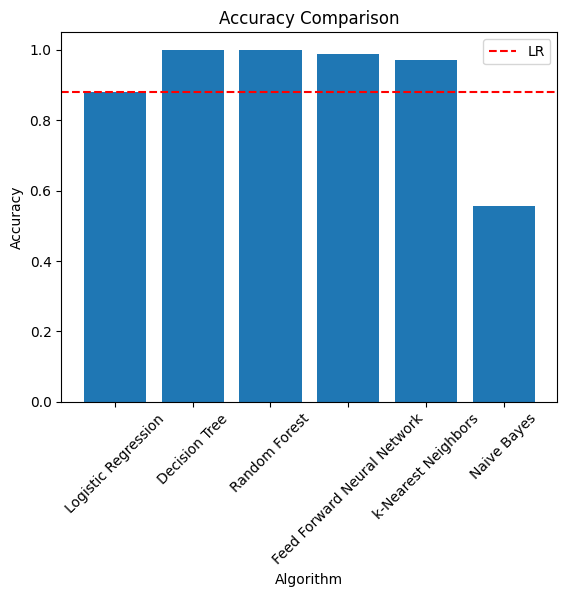

In [12]:
#visualisations comparation of the performance of different algorithms
# Bar Plot
import matplotlib.pyplot as plt

plt.bar(results_df.index, results_df['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.axhline(y=results_df.loc['Logistic Regression', 'Accuracy'], color='r', linestyle='--', label='LR')
plt.legend()
plt.show()

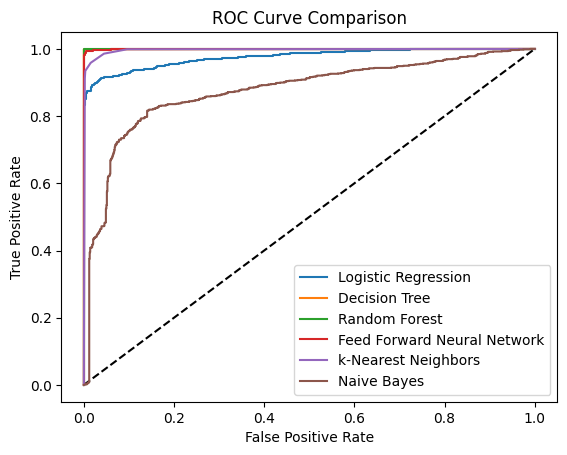

In [16]:
#ROC curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

# convert categorical labels to binary labels
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

plt.plot([0, 1], [0, 1], 'k--')
for name, model in models:
    fpr, tpr, thresholds = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

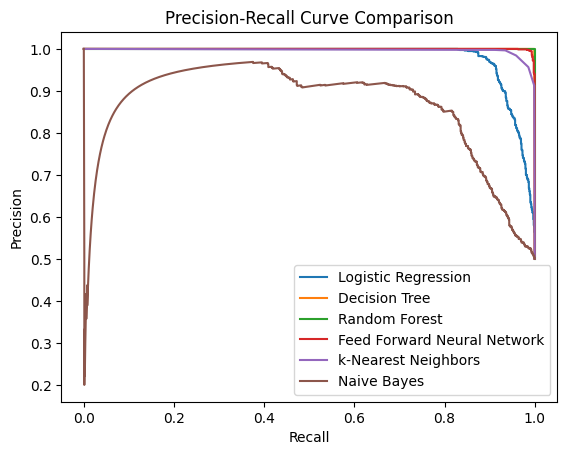

In [19]:
#Precision-Recall Curve
for name, model in models:
  precision, recall, thresholds = precision_recall_curve(y_test_binary, model.predict_proba(X_test)[:,1])
  plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [20]:
#Performing cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print("Model: ", name)
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Model:  Logistic Regression
Mean cross-validation score: 0.8440634673487922
Model:  Decision Tree
Mean cross-validation score: 0.9998639455782314
Model:  Random Forest
Mean cross-validation score: 0.9998639455782314
Model:  Feed Forward Neural Network
Mean cross-validation score: 0.9893870136610504
Model:  k-Nearest Neighbors
Mean cross-validation score: 0.9700650614469222
Model:  Naive Bayes
Mean cross-validation score: 0.5600756269810376


In [21]:
#Using hyperparameter tuning to optimize the performance of the best-performing model
from sklearn.model_selection import GridSearchCV

lr_params = {"C": np.logspace(-3, 3, 7)}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, solver='saga'), lr_params, cv=10)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

print(f"Best model: {best_lr_model}")

Best model: LogisticRegression(C=1000.0, max_iter=1000, random_state=42, solver='saga')


In [22]:
#Evaluate the performance of the best-performing model
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Small')
recall = recall_score(y_test, y_pred, pos_label='Small')
f1 = f1_score(y_test, y_pred, pos_label='Small')
print(f"Best model performance: {best_lr_model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("")

Best model performance: LogisticRegression(C=1000.0, max_iter=1000, random_state=42, solver='saga')
Accuracy: 0.8868335146898803
Precision: 0.827046918123275
Recall: 0.9782372143634385
F1 Score: 0.896311066799601



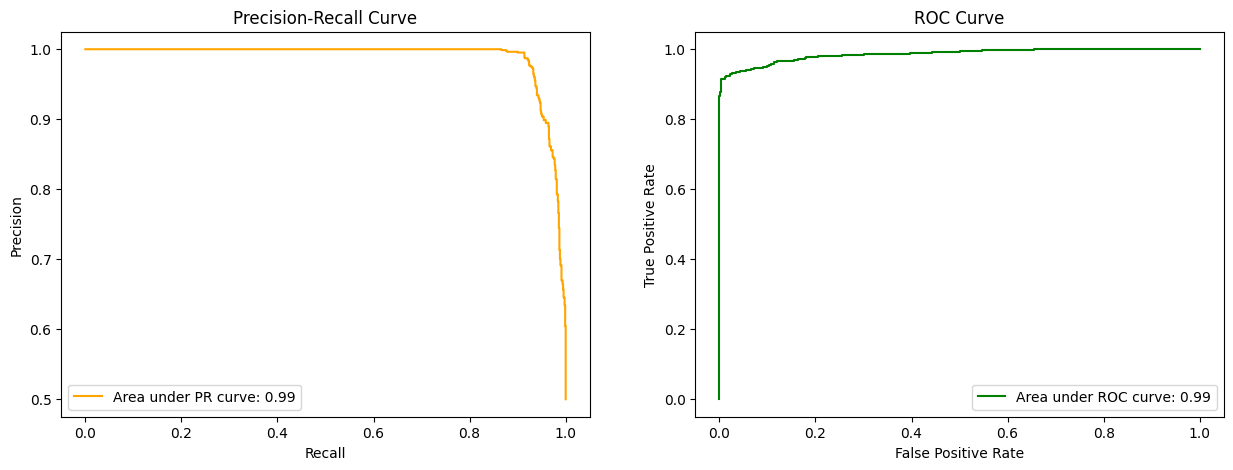

In [23]:
# Determine the threshold for identifying suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label='Small')
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba, pos_label='Small')
auc_score = auc(fpr, tpr)

# Plot the Precision-Recall curve and the ROC curve
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot the Precision-Recall curve
ax1.plot(recall, precision, color='orange', label=f"Area under PR curve: {auc_score:.2f}")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()

# Plot the ROC curve
ax2.plot(fpr, tpr, color='green', label=f"Area under ROC curve: {auc_score:.2f}")
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

In [24]:
# Set the threshold for identifying suspicious tax returns
threshold = 0.35
print(f"Threshold for identifying suspicious tax returns: {threshold:.2f}")

# Identify suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= threshold).astype(int) #creates a binary classification based on the threshold
fraudulent_cases = X_test[y_pred==1, :10] # select only the columns used for prediction
fraudulent_cases_df = pd.DataFrame(fraudulent_cases, columns=X.columns[:10])
print(f"Number of suspicious tax returns identified: {len(fraudulent_cases)}")

Threshold for identifying suspicious tax returns: 0.35
Number of suspicious tax returns identified: 1254


In [25]:
#Compare the performance of each model
names = []
accuracies = []
precisions = []
recalls = []
f1s = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Small')
    recall = recall_score(y_test, y_pred, pos_label='Small')
    f1 = f1_score(y_test, y_pred, pos_label='Small')
    names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    results_df = pd.DataFrame({"Model": names, "Accuracy": accuracies, "Precision": precisions, "Recall": recalls, "F1 Score": f1s})
print(results_df)

                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.854189   0.789333  0.966268  0.868885
1                Decision Tree  0.999456   1.000000  0.998912  0.999456
2                Random Forest  0.999456   1.000000  0.998912  0.999456
3  Feed Forward Neural Network  0.986942   0.998885  0.974973  0.986784
4          k-Nearest Neighbors  0.971708   0.984358  0.958651  0.971334
5                  Naive Bayes  0.554951   0.529688  0.980413  0.687786


In [10]:
print('Income',data['Income'].unique())

Income ['Medium' 'Small']
